# Image Analysis with Cellpose

This notebook provides a step-by-step guide to run image segmentation using **Cellpose**.

## Step 1: Install Required Packages
Run this in your terminal before starting the notebook:
```bash
pip install cellpose[gui] jupyter matplotlib numpy
```

## Step 2: Import Libraries

In [2]:
from cellpose import models, io, plot
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named 'cellpose'

## Step 3: Load Your Image
Replace `'your_image.tif'` with your actual image file.

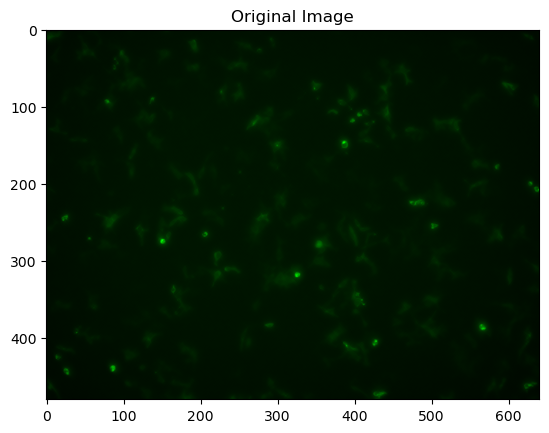

In [ ]:
#load and display image
image = io.imread("C:\\Users\\b1810\\Desktop\\coding\\images\\Psychatg02_07112025\\Psychatg02_07112025\\S+B+_w1\\W001\\P00001\\HM_W001_P00001_CH2.tif")
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

## Step 4: Run Cellpose Segmentation
Choose `model_type='cyto'` for cytoplasm or `model_type='nuclei'` for nuclei.

In [1]:
# set up the model
model = models.CellposeModel(gpu=True)
masks, flows, styles, diams = model.eval([image], diameter=None, channels=[0,0])    
# masks
# A 2D array where each segmented cell has a unique integer label.
# Example: masks[50,100] = 3 means pixel at (50,100) belongs to cell #3.
# flows
# Intermediate flow fields used by Cellpose for segmentation.
# Useful for debugging or advanced visualization.
# styles
# Style vectors representing the image features learned by the model.
# Used internally for model predictions.
# diams
# Estimated cell diameter(s) for your image.

NameError: name 'models' is not defined

## Step 5: Visualize Segmentation

In [5]:
fig = plt.figure(figsize=(8,8))
plot.show_segmentation(fig, image, masks, flows[0], channels=[0,0])
plt.show()

NameError: name 'masks' is not defined

<Figure size 800x800 with 0 Axes>

## Step 6: Save Results
This will save masks and flows to the specified folder.

In [ ]:
io.save_masks(image, masks, flows, 'output_folder', image_name='segmented_image')

## Step 7: (Optional) Batch Processing
For multiple images in a folder:

In [ ]:
images = io.load_images_from_folder('images_folder')
masks, flows, styles, diams = model.eval(images, diameter=None, channels=[0,0])